In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import scipy
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
# Set colors to match slides

navyBlue = '#073763'
red = '#ff0000ff'
gray = '#E6E6E6'
white = '#FFFFFF'

In [25]:
# Read in all CSVs needed

monthTSS = pd.read_csv('/content/drive/MyDrive/IndependentProjects/GuardiansProject/CSVs/monthStatsTwitterAndStandings.csv')
allTwitterData = pd.read_csv('/content/drive/MyDrive/IndependentProjects/GuardiansProject/CSVs/monthTwitter.csv')
followerWP = pd.read_csv('/content/drive/MyDrive/IndependentProjects/GuardiansProject/CSVs/monthStatsTwitterAndStandings.csv')
guardians_engagement = pd.read_csv('/content/drive/MyDrive/IndependentProjects/GuardiansProject/CSVs/guardians_engagement.csv')
guardians_engagement.drop(guardians_engagement.columns[[0,1,2,7,8,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]], axis=1, inplace=True) # drop unnecessary columns

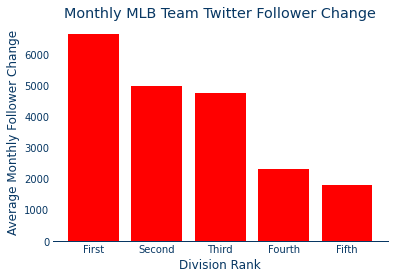

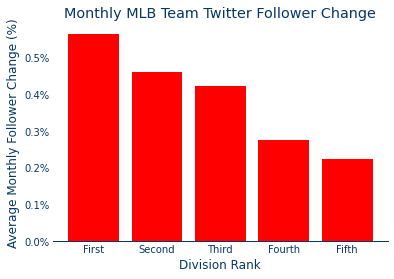

In [ ]:
## This cell plots the monthly change in twitter followers by divison rank

# filter columns, drop nan, and change divisionRank to a string
monthTSS = monthTSS[['year','month','nextMonth', 'teamId','teamName',
                     'nextMonthNumberOfFollowers', 'followerDiff',
                     'followerDiffPct', 'divisionRank'
                    ]]
monthTSS = monthTSS[monthTSS['divisionRank'].notna()]
monthTSS['divisionRank'] = monthTSS['divisionRank'].astype(int).astype(str)

# Group by division rank and find followerDiff/followerDiffPct
twitterChangeStandings = monthTSS.groupby('divisionRank').mean()[['followerDiff','followerDiffPct']].reset_index()

plt.style.use('ggplot')

#create figure and axes
fig, ax = plt.subplots()
ax.set_facecolor(white)

#create bar plot
ax.bar(twitterChangeStandings['divisionRank'], twitterChangeStandings['followerDiff'], color = red)

#set labels
ax.set_title('Monthly MLB Team Twitter Follower Change', color = navyBlue)
ax.set_xlabel('Division Rank', color = navyBlue)
ax.set_ylabel('Average Monthly Follower Change', color = navyBlue)

#format axes
ax.set_xticklabels(labels = ['First', 'Second', 'Third', 'Fourth', 'Fifth'], color = navyBlue)
ax.set_yticklabels(labels = np.arange(0, 7001, 1000), color = navyBlue)
ax.tick_params(length = 0) #remove tick marks
ax.spines['bottom'].set_color(navyBlue) #include x-axis line
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

print('\n')

#####################################################

plt.style.use('ggplot')

#create figure and axes
fig, ax = plt.subplots()
ax.set_facecolor('white')

#create bar plot
ax.bar(twitterChangeStandings['divisionRank'], twitterChangeStandings['followerDiffPct'], color = red)

#set labels
ax.set_title('Monthly MLB Team Twitter Follower Change', color = navyBlue)
ax.set_xlabel('Division Rank', color = navyBlue)
ax.set_ylabel('Average Monthly Follower Change (%)', color = navyBlue)

#format axes
ax.set_xticklabels(labels = ['First', 'Second', 'Third', 'Fourth', 'Fifth']) #standing label
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 1)) #format y-axis as percent
ax.tick_params(colors=navyBlue) #color tick labels
ax.tick_params(length = 0) #remove tick marks
ax.spines['bottom'].set_color(navyBlue) #include x-axis line
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

[]

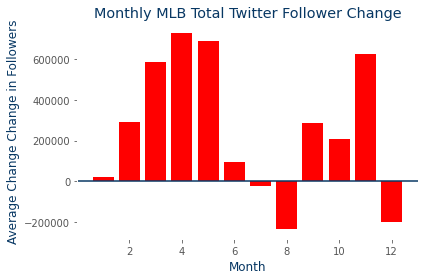

In [ ]:
## This cell plots the monthly MLB Total Twitter follower change

# create df with filtered columns and group by month with total sum of followerDiff
total = pd.DataFrame(allTwitterData)
total.drop(["teamId", "numberOfFollowers",'year','followerDiffPct'], axis = 1, inplace = True)
grp1 = total.groupby(['month'])['followerDiff'].sum(min_count=1)
grp1 = pd.DataFrame(grp1)

#create figure and axes
fig, ax = plt.subplots()
ax.set_facecolor('white')

#plot bar graph
ax.bar(grp1.index, grp1['followerDiff'], color = red)
ax.axhline(0, color = navyBlue)

#set labels
ax.set_title('Monthly MLB Total Twitter Follower Change', color = navyBlue)
ax.set_xlabel('Month', color = navyBlue)
ax.set_ylabel('Average Change Change in Followers', color = navyBlue)

plt.tight_layout()

plt.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

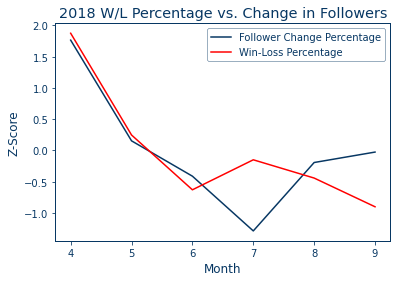

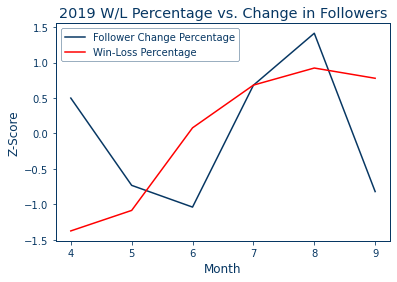

In [ ]:
## This cell plots the W/L Percentage and change in followers

followerWP = pd.DataFrame(followerWP)
followerWP = followerWP[followerWP['teamId'] == 114] # Filters to only Guardians
followerWP = followerWP[followerWP['month'].isin([4,5,6,7,8,9])] # Filters to only months playing
# separate to 2018 and 2019 (only full seasons we have data for)
df_2018 = followerWP[followerWP['year'] == 2018]
df_2019 = followerWP[followerWP['year'] == 2019]

# calculate z score of followerDiffPct for 2018 and 2019
df_2018.set_index('month', inplace=True, drop=True)
df_2018['followerDiffPct'] = (df_2018['followerDiffPct']-df_2018['followerDiffPct'].mean()) / df_2018['followerDiffPct'].std()
df_2018['xWinLossPct'] = (df_2018['xWinLossPct']-df_2018['xWinLossPct'].mean()) / df_2018['xWinLossPct'].std()
df_2019.set_index('month', inplace=True, drop=True)
df_2019['followerDiffPct'] = (df_2019['followerDiffPct']-df_2019['followerDiffPct'].mean()) / df_2019['followerDiffPct'].std()
df_2019['xWinLossPct'] = (df_2019['xWinLossPct']-df_2019['xWinLossPct'].mean()) / df_2019['xWinLossPct'].std()

#create figure and axes
fig, ax = plt.subplots()
ax.set_facecolor('white')

#plot followerDiffPct and WL pct for 2018
ax.plot(df_2018.index, df_2018['followerDiffPct'], color = navyBlue, label = 'Follower Change Percentage')
ax.plot(df_2018.index, df_2018['xWinLossPct'], color = red, label = 'Win-Loss Percentage')

#set labels
ax.set_title('2018 W/L Percentage vs. Change in Followers', color = navyBlue)
ax.set_xlabel('Month', color = navyBlue)
ax.set_ylabel('Z-Score', color = navyBlue)

ax.tick_params(colors=navyBlue) #color tick labels

ax.spines['bottom'].set_color(navyBlue) #include x-axis line
ax.spines['top'].set_color(navyBlue)
ax.spines['left'].set_color(navyBlue)
ax.spines['right'].set_color(navyBlue)

#create legend and color
l = plt.legend()
l.get_frame().set_edgecolor(navyBlue)
l.get_frame().set_facecolor(white)
for text in l.get_texts():
    text.set_color(navyBlue)

plt.show()

print('\n')

############################################################################

#creat figure and axes
fig, ax = plt.subplots()
ax.set_facecolor('white')

#plot followerDiffPct and WL pct for 2019
ax.plot(df_2019.index, df_2019['followerDiffPct'], color = navyBlue, label = 'Follower Change Percentage')
ax.plot(df_2019.index, df_2019['xWinLossPct'], color = red, label = 'Win-Loss Percentage')

#set labels
ax.set_title('2019 W/L Percentage vs. Change in Followers', color = navyBlue)
ax.set_xlabel('Month', color = navyBlue)
ax.set_ylabel('Z-Score', color = navyBlue)

ax.tick_params(colors=navyBlue) #color tick labels

ax.spines['bottom'].set_color(navyBlue) #include x-axis line
ax.spines['top'].set_color(navyBlue)
ax.spines['left'].set_color(navyBlue)
ax.spines['right'].set_color(navyBlue)

#create legend
l = plt.legend()
l.get_frame().set_edgecolor(navyBlue)
l.get_frame().set_facecolor(white)
for text in l.get_texts():
    text.set_color(navyBlue)

plt.show()

In [30]:
## This cell plots the r and p values for different individual statistics and target values

# Split into hitters and pitchers
pitchers = guardians_engagement[guardians_engagement['positionName'] == 'Pitcher']
hitters = guardians_engagement[guardians_engagement['positionName'] != 'Pitcher']

# Find r vals
hitter_rvals = hitters.corr()
pitcher_rvals = pitchers.corr()

# Find p vals
hitter_pvals = hitters.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*hitter_rvals.shape)
pitcher_pvals = pitchers.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*pitcher_rvals.shape)

# Drop unneccesary columns for all datasets
hitter_rvals.drop(['runsScored_x', 'doubles', 'triples', 'homeRuns', 'strikeOuts', 'hits', 'atBats', 'caughtStealing', 'stolenBases', 'totalBases', 'rbi', 'runsPitching', 'homeRunsPitching', 'strikeOutsPitching', 'hitsPitching', 'inningsPitched', 'strikes', 'saves', 'assists', 'errors', 'chances'], inplace=True, axis=1)
hitter_rvals.drop(['target1', 'target2', 'target3', 'target4'], inplace=True, axis=0)

pitcher_rvals.drop(['runsScored_x', 'doubles', 'triples', 'homeRuns', 'strikeOuts', 'hits', 'atBats', 'caughtStealing', 'stolenBases', 'totalBases', 'rbi', 'runsPitching', 'homeRunsPitching', 'strikeOutsPitching', 'hitsPitching', 'inningsPitched', 'strikes', 'saves', 'assists', 'errors', 'chances'], inplace=True, axis=1)
pitcher_rvals.drop(['target1', 'target2', 'target3', 'target4'], inplace=True, axis=0)

hitter_pvals.drop(['runsScored_x', 'doubles', 'triples', 'homeRuns', 'strikeOuts', 'hits', 'atBats', 'caughtStealing', 'stolenBases', 'totalBases', 'rbi', 'runsPitching', 'homeRunsPitching', 'strikeOutsPitching', 'hitsPitching', 'inningsPitched', 'strikes', 'saves', 'assists', 'errors', 'chances'], inplace=True, axis=1)
hitter_pvals.drop(['target1', 'target2', 'target3', 'target4'], inplace=True, axis=0)

pitcher_pvals.drop(['runsScored_x', 'doubles', 'triples', 'homeRuns', 'strikeOuts', 'hits', 'atBats', 'caughtStealing', 'stolenBases', 'totalBases', 'rbi', 'runsPitching', 'homeRunsPitching', 'strikeOutsPitching', 'hitsPitching', 'inningsPitched', 'strikes', 'saves', 'assists', 'errors', 'chances'], inplace=True, axis=1)
pitcher_pvals.drop(['target1', 'target2', 'target3', 'target4'], inplace=True, axis=0)

# Print results
print('                                     Hitters')
print(f'R Values:\n{hitter_rvals}\n\n')
print(f'P Values:\n{hitter_pvals}\n\n\n')

print('                                     Pitchers')
print(f'R Values:\n{pitcher_rvals}\n\n')
print(f'P Values:\n{pitcher_pvals}')

                                     Hitters
R Values:
                     target1   target2   target3   target4
runsScored_x        0.256756  0.275769  0.158264  0.160239
doubles             0.093975  0.129997  0.091951  0.085650
triples             0.050389  0.077308  0.023175  0.002238
homeRuns            0.349396  0.265328  0.206604  0.144279
strikeOuts         -0.037269 -0.055752 -0.030643 -0.027165
hits                0.225616  0.250312  0.147823  0.165622
atBats              0.147786  0.237979  0.111773  0.148782
caughtStealing      0.018283  0.049884  0.013561  0.003875
stolenBases         0.029111  0.088858  0.019603  0.032885
totalBases          0.342532  0.316164  0.216999  0.185004
rbi                 0.356182  0.272682  0.196229  0.159595
runsPitching             NaN       NaN       NaN       NaN
homeRunsPitching         NaN       NaN       NaN       NaN
strikeOutsPitching       NaN       NaN       NaN       NaN
hitsPitching             NaN       NaN       NaN       NaN
i

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
